# Simple Linear Regression

$ y = m * x + b $




## Numpy

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from mpl_toolkits.mplot3d import Axes3D

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=1, random_state=42)

In [3]:
# Adding intercept b to the X features matrix
X_b = np.hstack([X, np.ones((X.shape[0], 1))])

In [4]:
beta, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=None)

In [5]:
intercept, coef = beta

Intercept: 42.010707282615584
Coefficient: 0.11651153205270262


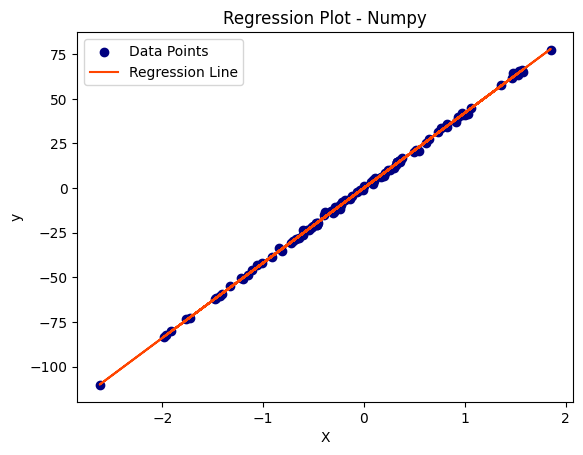

In [6]:
print("Intercept:", intercept)
print("Coefficient:", coef)

plt.scatter(X, y, color='navy', label='Data Points')
plt.title("Regression Plot - Numpy")
plt.plot(X, X_b.dot(beta), color='orangered', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## sklearn

In [7]:
X, y = make_regression(n_samples=100, n_features=1, noise=1, random_state=42)

In [8]:
linear_regression_model = LinearRegression()

In [9]:
linear_regression_model.fit(X, y)

LinearRegression()

In [10]:
# Coefficient of the Regression Line
linear_regression_model.coef_

array([42.01070728])

In [11]:
# Rank of the matrix X
linear_regression_model.rank_

1

In [12]:
# Singular values of X
linear_regression_model.singular_

array([9.03616177])

In [13]:
# Intercept of the Regression Line
linear_regression_model.intercept_

0.11651153205269615

In [14]:
# Coefficient of determination of the prediction. Best possible score is 1.0
linear_regression_model.score(X, y)

0.9994586558970464

Intercept: 42.010707282615584
Coefficient: 0.11651153205270262


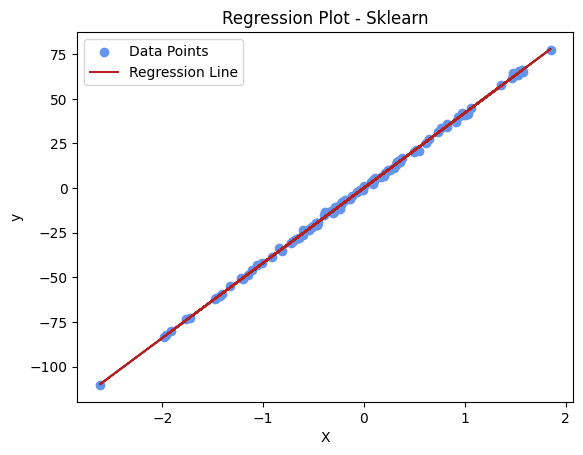

In [15]:
print("Intercept:", intercept)
print("Coefficient:", coef)

plt.scatter(X, y, color='cornflowerblue', label='Data Points')
plt.title("Regression Plot - Sklearn")
plt.plot(X, linear_regression_model.predict(X), color='firebrick', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Statsmodels

In [16]:
X, y = make_regression(n_samples=100, n_features=1, noise=1, random_state=42)

In [17]:
# Adding intercept to X
X = sm.add_constant(X, prepend=False)

In [18]:
ols_model = sm.OLS(y, X).fit()

In [19]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.809e+05
Date:                Tue, 18 Jun 2024   Prob (F-statistic):          7.01e-162
Time:                        12:13:19   Log-Likelihood:                -129.51
No. Observations:                 100   AIC:                             263.0
Df Residuals:                      98   BIC:                             268.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            42.0107      0.099    425.362      0.000      41.815      42.207
const          0.1165      0.090      1.297      0.198      -0.062       0.295
==============================================================================
Omnibus:                        0.052   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.080
Skew:                           0.048   Prob(JB):                        0.961
Kurtosis:                       2.900   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
coeffs, intercept = ols_model.params

Intercept: 0.11651153205270082
Coefficient: 0.11651153205270262


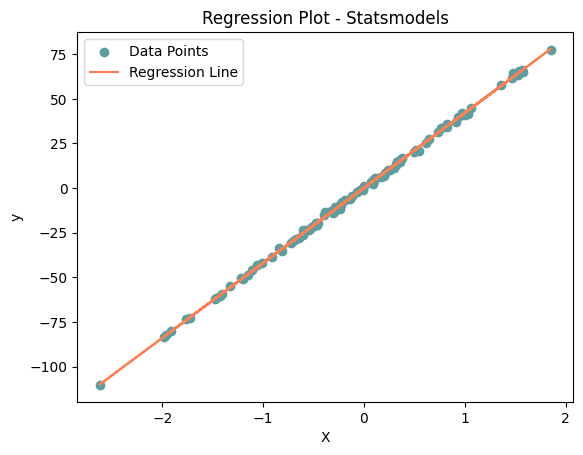

In [21]:
print("Intercept:", intercept)
print("Coefficient:", coef)

plt.scatter(X[:, 0], y, color='cadetblue', label='Data Points')
plt.title("Regression Plot - Statsmodels")
plt.plot(X[:, 0], ols_model.predict(X), color='coral', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Multiple Linear Regression

$ y = {\beta}_{0} + \sum \limits _{i=1} ^{n} {\beta}_{i} x_{i} $

## Numpy

In [22]:
X, y = make_regression(n_samples=1000, n_features=2, noise=1.25, random_state=42)

In [23]:
# Adding intercept to X
X_added_intercept = np.hstack([X, np.ones((X.shape[0], 1))])

In [24]:
beta, residuals, rank, singular_values = np.linalg.lstsq(X_added_intercept, y, rcond=False)

In [25]:
beta #coeffs+intercept

array([4.07554638e+01, 6.62571057e+00, 1.96096608e-03])

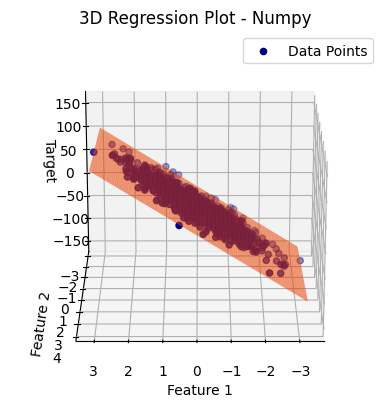

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, color='navy', label='Data Points')

x_surf, y_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

z_surf = beta[-1] + beta[0] * x_surf + beta[1] * y_surf
regression_plane = ax.plot_surface(x_surf, y_surf, z_surf, color='orangered', alpha=0.6)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Regression Plot - Numpy')

ax.legend()
ax.view_init(20, 90)
plt.show()

## sklearn

In [27]:
X, y = make_regression(n_samples=1000, n_features=2, noise=1.25, random_state=42)

In [28]:
linear_regression_model = LinearRegression()

In [29]:
linear_regression_model.fit(X, y)

LinearRegression()

In [30]:
# Coefficients of the Regression Plane
linear_regression_model.coef_

array([40.7554638 ,  6.62571057])

In [31]:
# Rank of the matrix X
linear_regression_model.rank_

2

In [32]:
# Singular values of X
linear_regression_model.singular_

array([32.08071738, 30.39236906])

In [33]:
# Intercept of the Regression Line
linear_regression_model.intercept_

0.001960966079046944

In [34]:
# Coefficients of determination of the prediction. Best possible score is 1.0
linear_regression_model.score(X, y)

0.9990436477967307

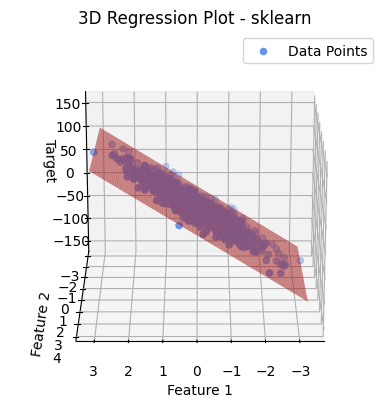

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, color='cornflowerblue', label='Data Points')

x_surf, y_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

z_surf = linear_regression_model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='firebrick', alpha=0.6)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Regression Plot - sklearn')

ax.legend()
ax.view_init(20, 90)
plt.show()

## Statsmodels

In [36]:
X, y = make_regression(n_samples=1000, n_features=2, noise=1.25, random_state=42)

In [37]:
# Adding intercept to X
X = sm.add_constant(X, prepend=False)

In [38]:
ols_model = sm.OLS(y, X).fit()

In [39]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.208e+05
Date:                Tue, 18 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:13:21   Log-Likelihood:                -1626.1
No. Observations:                1000   AIC:                             3258.
Df Residuals:                     997   BIC:                             3273.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            40.7555      0.041   1005.405      0.000      40.676      40.835
x2             6.6257      0.038    172.520      0.000       6.550       6.701
const          0.0020      0.039      0.050      0.960      -0.075       0.079
==============================================================================
Omnibus:                        1.910   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.796
Skew:                           0.066   Prob(JB):                        0.407
Kurtosis:                       3.160   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
coeffs, intercept_1, intercep_2 = ols_model.params

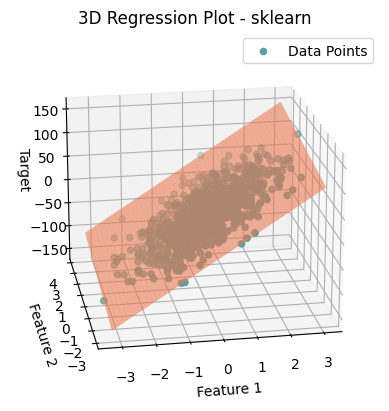

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, color='cadetblue', label='Data Points')

x_surf, y_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

z_surf = ols_model.predict(np.c_[x_surf.ravel(), y_surf.ravel(), np.ones((x_surf.ravel().shape[0]))]).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='coral', alpha=0.6)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Regression Plot - sklearn')

ax.legend()
ax.view_init(20, 260)
plt.show()

# Ridge, Lasso Regression

## Ridge

In [42]:
X, y = make_regression(n_samples=1000, n_features=2, noise=1.25, random_state=42)

In [43]:
ridge_model = Ridge(alpha=10.0)

In [44]:
ridge_model.fit(X, y)

Ridge(alpha=10.0)

In [45]:
# Coefficients of the Regression Plane
ridge_model.coef_

array([40.31916512,  6.56300529])

In [46]:
# Intercept of the Regression Line
ridge_model.intercept_

0.02001311849132259

In [47]:
# Coefficients of determination of the prediction. Best possible score is 1.0
ridge_model.score(X, y)

0.9989298805984309

## Lasso

In [48]:
X, y = make_regression(n_samples=1000, n_features=2, noise=1.25, random_state=42)

In [49]:
lasso_model = Lasso(alpha=1.0)

In [50]:
lasso_model.fit(X, y)

Lasso()

In [51]:
# Coefficients of the Regression Plane
lasso_model.coef_

array([39.67557039,  5.65664314])

In [52]:
# Intercept of the Regression Line
lasso_model.intercept_

0.0930180091686914

In [53]:
# Coefficients of determination of the prediction. Best possible score is 1.0
lasso_model.score(X, y)

0.9977488192404677